In [1]:
# ---------------- Normal imports ----------------
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
from PIL import Image
from sklearn.model_selection import train_test_split
from pathlib import Path
from random import randrange
from sklearn.metrics import confusion_matrix
# ---------------- Keras related imports ----------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# ---------------- Importing Dataset Path into a variable ----------------
Dataset = Path("Malaria/cell_images")
Dataset

WindowsPath('Malaria/cell_images')

In [3]:
list(Dataset.glob('Parasitized/*.png'))[:5]

[WindowsPath('Malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'),
 WindowsPath('Malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png'),
 WindowsPath('Malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'),
 WindowsPath('Malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png'),
 WindowsPath('Malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png')]

In [4]:
Parasitized = list(Dataset.glob('Parasitized/*'))
Parasitized[:5]

[WindowsPath('Malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'),
 WindowsPath('Malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png'),
 WindowsPath('Malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'),
 WindowsPath('Malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png'),
 WindowsPath('Malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png')]

In [5]:
Uninfected = list(Dataset.glob('Uninfected/*'))
Uninfected[:5]

[WindowsPath('Malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png'),
 WindowsPath('Malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'),
 WindowsPath('Malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_144.png'),
 WindowsPath('Malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_21.png'),
 WindowsPath('Malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_25.png')]

In [6]:
image_count = len(list(Dataset.glob('*/*.png')))
print(image_count)

27558


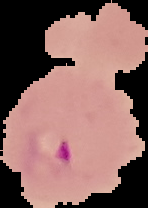

In [7]:
PIL.Image.open(str(Parasitized[1]))

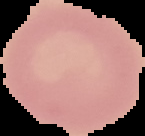

In [8]:
PIL.Image.open(str(Uninfected[1]))

In [9]:
# ---------------- Putting Folder contents into a list ----------------
cell_images_dict = {
    'Parasitized': list(Dataset.glob('Parasitized/*')),
    'Uninfected': list(Dataset.glob('Uninfected/*'))
}

In [10]:
# ---------------- Encoding Labels ----------------
cell_labels_dict = {
    'Parasitized': 0,
    'Uninfected': 1
}

In [11]:
cell_images_dict['Parasitized'][:5]

[WindowsPath('Malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'),
 WindowsPath('Malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png'),
 WindowsPath('Malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'),
 WindowsPath('Malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png'),
 WindowsPath('Malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png')]

In [12]:
str(cell_images_dict['Parasitized'][0])

'Malaria\\cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [13]:
img = cv2.imread(str(cell_images_dict['Parasitized'][0]))

In [14]:
img.shape

(148, 142, 3)

In [15]:
cv2.resize(img,(128,128)).shape

(128, 128, 3)

In [16]:
# ---------------- Loading images from directory ----------------
IMG_SIZE = 128

img_array, label_array = [], []
img_count = 0
img_limit = 3500

for cell_name, images in cell_images_dict.items():
    for image in images:
        if img_count > img_limit:
            break
        img = cv2.imread(str(image))
        print(str(image))
        resized_img = cv2.resize(img,(IMG_SIZE, IMG_SIZE))
        img_array.append(resized_img)
        label_array.append(cell_labels_dict[cell_name])
        img_count+=1
    img_count = 0

img_array, label_array = np.array(img_array), np.array(label_array)

Malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_162.png
Malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_163.png
Malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_164.png
Malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_165.png
Malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_166.png
Malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_167.png
Malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_168.png
Malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_169.png
Malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_170.png
Malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_171.png
Malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144348_cell_138.png
Malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144348_cell_139.png
Malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144348

Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_151239_cell_81.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_151239_cell_82.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_151239_cell_83.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_151239_cell_84.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_151239_cell_85.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_151239_cell_86.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_151239_cell_87.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_151239_cell_88.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_151239_cell_89.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_151239_cell_90.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_151239_cell_91.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_151239_cell_92.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_151239_cell_93.png

Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_155731_cell_69.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_155731_cell_70.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_155731_cell_71.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_155731_cell_72.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_155731_cell_73.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_155731_cell_74.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_155731_cell_75.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_155731_cell_76.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_155731_cell_77.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_155731_cell_78.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_155731_cell_79.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_155731_cell_80.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150918_155731_cell_81.png

Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150923_170246_cell_88.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150923_170246_cell_89.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150923_170246_cell_90.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150923_170344_cell_100.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150923_170344_cell_71.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150923_170344_cell_72.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150923_170344_cell_73.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150923_170344_cell_74.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150923_170344_cell_75.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150923_170344_cell_76.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150923_170344_cell_77.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150923_170344_cell_78.png
Malaria\cell_images\Parasitized\C101P62ThinF_IMG_20150923_170344_cell_79.pn

Malaria\cell_images\Parasitized\C105P66ThinF_IMG_20150924_095034_cell_149.png
Malaria\cell_images\Parasitized\C105P66ThinF_IMG_20150924_095034_cell_150.png
Malaria\cell_images\Parasitized\C105P66ThinF_IMG_20150924_095130_cell_155.png
Malaria\cell_images\Parasitized\C105P66ThinF_IMG_20150924_095130_cell_156.png
Malaria\cell_images\Parasitized\C105P66ThinF_IMG_20150924_095130_cell_157.png
Malaria\cell_images\Parasitized\C105P66ThinF_IMG_20150924_095130_cell_158.png
Malaria\cell_images\Parasitized\C105P66ThinF_IMG_20150924_095633_cell_126.png
Malaria\cell_images\Parasitized\C105P66ThinF_IMG_20150924_095716_cell_113.png
Malaria\cell_images\Parasitized\C105P66ThinF_IMG_20150924_095716_cell_114.png
Malaria\cell_images\Parasitized\C105P66ThinF_IMG_20150924_095913_cell_117.png
Malaria\cell_images\Parasitized\C105P66ThinF_IMG_20150924_095913_cell_118.png
Malaria\cell_images\Parasitized\C105P66ThinF_IMG_20150924_100655_cell_123.png
Malaria\cell_images\Parasitized\C105P66ThinF_IMG_20150924_100655

Malaria\cell_images\Parasitized\C109P70ThinF_IMG_20150930_103113_cell_160.png
Malaria\cell_images\Parasitized\C109P70ThinF_IMG_20150930_103113_cell_161.png
Malaria\cell_images\Parasitized\C109P70ThinF_IMG_20150930_103113_cell_162.png
Malaria\cell_images\Parasitized\C109P70ThinF_IMG_20150930_103214_cell_182.png
Malaria\cell_images\Parasitized\C109P70ThinF_IMG_20150930_103214_cell_183.png
Malaria\cell_images\Parasitized\C109P70ThinF_IMG_20150930_103214_cell_184.png
Malaria\cell_images\Parasitized\C109P70ThinF_IMG_20150930_103214_cell_185.png
Malaria\cell_images\Parasitized\C109P70ThinF_IMG_20150930_103645_cell_172.png
Malaria\cell_images\Parasitized\C109P70ThinF_IMG_20150930_103645_cell_173.png
Malaria\cell_images\Parasitized\C109P70ThinF_IMG_20150930_103645_cell_174.png
Malaria\cell_images\Parasitized\C109P70ThinF_IMG_20150930_103645_cell_175.png
Malaria\cell_images\Parasitized\C109P70ThinF_IMG_20150930_103811_cell_157.png
Malaria\cell_images\Parasitized\C109P70ThinF_IMG_20150930_103811

Malaria\cell_images\Parasitized\C114P75ThinF_IMG_20150930_150013_cell_196.png
Malaria\cell_images\Parasitized\C114P75ThinF_IMG_20150930_150057_cell_172.png
Malaria\cell_images\Parasitized\C114P75ThinF_IMG_20150930_150145_cell_159.png
Malaria\cell_images\Parasitized\C114P75ThinF_IMG_20150930_150145_cell_160.png
Malaria\cell_images\Parasitized\C114P75ThinF_IMG_20150930_150555_cell_145.png
Malaria\cell_images\Parasitized\C114P75ThinF_IMG_20150930_150733_cell_149.png
Malaria\cell_images\Parasitized\C114P75ThinF_IMG_20150930_150733_cell_150.png
Malaria\cell_images\Parasitized\C114P75ThinF_IMG_20150930_150833_cell_164.png
Malaria\cell_images\Parasitized\C114P75ThinF_IMG_20150930_150833_cell_165.png
Malaria\cell_images\Parasitized\C114P75ThinF_IMG_20150930_151150_cell_177.png
Malaria\cell_images\Parasitized\C114P75ThinF_IMG_20150930_151150_cell_178.png
Malaria\cell_images\Parasitized\C114P75ThinF_IMG_20150930_151150_cell_179.png
Malaria\cell_images\Parasitized\C115P76ThinF_IMG_20150930_161825

Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171558_cell_116.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171558_cell_117.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171558_cell_118.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171558_cell_119.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171558_cell_120.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171558_cell_121.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171558_cell_122.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171558_cell_123.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171558_cell_124.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171558_cell_125.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171558_cell_126.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171558_cell_127.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171558

Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_61.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_62.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_63.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_64.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_65.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_66.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_67.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_68.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_69.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_70.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_71.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_72.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_73.png

Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_66.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_67.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_68.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_69.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_70.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_71.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_72.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_73.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_74.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_75.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_76.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_77.png
Malaria\cell_images\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_78.png

Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_104831_cell_163.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_104831_cell_164.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_104831_cell_165.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_104831_cell_166.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_104831_cell_167.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_104831_cell_168.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_105018_cell_133.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_105018_cell_134.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_105018_cell_135.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_105018_cell_136.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_105018_cell_137.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_105018_cell_138.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_105018

Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_105827_cell_158.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_105827_cell_159.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_110002_cell_1.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_110002_cell_10.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_110002_cell_11.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_110002_cell_12.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_110002_cell_13.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_110002_cell_14.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_110002_cell_15.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_110002_cell_16.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_110002_cell_17.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_110002_cell_18.png
Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_110002_cell_19.pn

Malaria\cell_images\Parasitized\C118P79ThinF_IMG_20151002_110942_cell_9.png
Malaria\cell_images\Parasitized\C119P80ThinF_IMG_20151002_122720_cell_158.png
Malaria\cell_images\Parasitized\C119P80ThinF_IMG_20151002_122720_cell_159.png
Malaria\cell_images\Parasitized\C119P80ThinF_IMG_20151002_122720_cell_160.png
Malaria\cell_images\Parasitized\C119P80ThinF_IMG_20151002_122720_cell_161.png
Malaria\cell_images\Parasitized\C119P80ThinF_IMG_20151002_122720_cell_162.png
Malaria\cell_images\Parasitized\C119P80ThinF_IMG_20151002_122720_cell_163.png
Malaria\cell_images\Parasitized\C119P80ThinF_IMG_20151002_122720_cell_164.png
Malaria\cell_images\Parasitized\C119P80ThinF_IMG_20151002_122720_cell_165.png
Malaria\cell_images\Parasitized\C119P80ThinF_IMG_20151002_122720_cell_166.png
Malaria\cell_images\Parasitized\C119P80ThinF_IMG_20151002_122720_cell_167.png
Malaria\cell_images\Parasitized\C119P80ThinF_IMG_20151002_122720_cell_168.png
Malaria\cell_images\Parasitized\C119P80ThinF_IMG_20151002_122720_c

Malaria\cell_images\Parasitized\C120P81ThinF_IMG_20151002_125443_cell_147.png
Malaria\cell_images\Parasitized\C120P81ThinF_IMG_20151002_125443_cell_148.png
Malaria\cell_images\Parasitized\C120P81ThinF_IMG_20151002_130150_cell_196.png
Malaria\cell_images\Parasitized\C120P81ThinF_IMG_20151002_130150_cell_197.png
Malaria\cell_images\Parasitized\C120P81ThinF_IMG_20151002_130150_cell_198.png
Malaria\cell_images\Parasitized\C120P81ThinF_IMG_20151002_130150_cell_199.png
Malaria\cell_images\Parasitized\C120P81ThinF_IMG_20151002_130150_cell_200.png
Malaria\cell_images\Parasitized\C120P81ThinF_IMG_20151002_130150_cell_201.png
Malaria\cell_images\Parasitized\C120P81ThinF_IMG_20151002_130150_cell_202.png
Malaria\cell_images\Parasitized\C120P81ThinF_IMG_20151002_130150_cell_203.png
Malaria\cell_images\Parasitized\C120P81ThinF_IMG_20151002_130150_cell_204.png
Malaria\cell_images\Parasitized\C120P81ThinF_IMG_20151002_130150_cell_205.png
Malaria\cell_images\Parasitized\C120P81ThinF_IMG_20151002_130150

Malaria\cell_images\Parasitized\C123P84ThinF_IMG_20151002_151851_cell_179.png
Malaria\cell_images\Parasitized\C123P84ThinF_IMG_20151002_151851_cell_180.png
Malaria\cell_images\Parasitized\C123P84ThinF_IMG_20151002_151851_cell_181.png
Malaria\cell_images\Parasitized\C123P84ThinF_IMG_20151002_151851_cell_182.png
Malaria\cell_images\Parasitized\C123P84ThinF_IMG_20151002_152144_cell_183.png
Malaria\cell_images\Parasitized\C123P84ThinF_IMG_20151002_152144_cell_184.png
Malaria\cell_images\Parasitized\C123P84ThinF_IMG_20151002_152144_cell_185.png
Malaria\cell_images\Parasitized\C123P84ThinF_IMG_20151002_152144_cell_186.png
Malaria\cell_images\Parasitized\C123P84ThinF_IMG_20151002_152144_cell_187.png
Malaria\cell_images\Parasitized\C123P84ThinF_IMG_20151002_152144_cell_188.png
Malaria\cell_images\Parasitized\C123P84ThinF_IMG_20151002_152144_cell_189.png
Malaria\cell_images\Parasitized\C123P84ThinF_IMG_20151002_152144_cell_190.png
Malaria\cell_images\Parasitized\C123P84ThinF_IMG_20151002_152144

Malaria\cell_images\Parasitized\C127P88ThinF_IMG_20151004_111436_cell_125.png
Malaria\cell_images\Parasitized\C127P88ThinF_IMG_20151004_111526_cell_101.png
Malaria\cell_images\Parasitized\C127P88ThinF_IMG_20151004_111651_cell_133.png
Malaria\cell_images\Parasitized\C127P88ThinF_IMG_20151004_111755_cell_117.png
Malaria\cell_images\Parasitized\C127P88ThinF_IMG_20151004_111755_cell_118.png
Malaria\cell_images\Parasitized\C127P88ThinF_IMG_20151004_112126_cell_107.png
Malaria\cell_images\Parasitized\C127P88ThinF_IMG_20151004_112301_cell_123.png
Malaria\cell_images\Parasitized\C127P88ThinF_IMG_20151004_112301_cell_124.png
Malaria\cell_images\Parasitized\C127P88ThinF_IMG_20151004_112301_cell_125.png
Malaria\cell_images\Parasitized\C127P88ThinF_IMG_20151004_112418_cell_143.png
Malaria\cell_images\Parasitized\C128P89ThinF_IMG_20151004_130408_cell_146.png
Malaria\cell_images\Parasitized\C128P89ThinF_IMG_20151004_130408_cell_147.png
Malaria\cell_images\Parasitized\C128P89ThinF_IMG_20151004_130408

Malaria\cell_images\Parasitized\C128P89ThinF_IMG_20151004_131753_cell_137.png
Malaria\cell_images\Parasitized\C128P89ThinF_IMG_20151004_131753_cell_138.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133244_cell_100.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133244_cell_101.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133244_cell_102.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133244_cell_103.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133244_cell_104.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133244_cell_105.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133244_cell_106.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133244_cell_107.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133244_cell_108.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133244_cell_109.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133244

Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_102.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_103.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_104.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_105.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_106.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_107.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_108.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_109.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_110.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_111.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_112.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_113.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921

Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134944_cell_11.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134944_cell_12.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134944_cell_13.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134944_cell_14.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134944_cell_15.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134944_cell_16.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134944_cell_17.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134944_cell_18.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134944_cell_19.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134944_cell_2.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134944_cell_20.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134944_cell_21.png
Malaria\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134944_cell_22.png


Malaria\cell_images\Parasitized\C130P91ThinF_IMG_20151004_142951_cell_160.png
Malaria\cell_images\Parasitized\C130P91ThinF_IMG_20151004_142951_cell_161.png
Malaria\cell_images\Parasitized\C130P91ThinF_IMG_20151004_142951_cell_162.png
Malaria\cell_images\Parasitized\C130P91ThinF_IMG_20151004_142951_cell_163.png
Malaria\cell_images\Parasitized\C131P92ThinF_IMG_20151004_145224_cell_128.png
Malaria\cell_images\Parasitized\C131P92ThinF_IMG_20151004_145224_cell_129.png
Malaria\cell_images\Parasitized\C131P92ThinF_IMG_20151004_145224_cell_130.png
Malaria\cell_images\Parasitized\C131P92ThinF_IMG_20151004_145224_cell_131.png
Malaria\cell_images\Parasitized\C131P92ThinF_IMG_20151004_145224_cell_132.png
Malaria\cell_images\Parasitized\C131P92ThinF_IMG_20151004_145224_cell_133.png
Malaria\cell_images\Parasitized\C131P92ThinF_IMG_20151004_145224_cell_134.png
Malaria\cell_images\Parasitized\C131P92ThinF_IMG_20151004_145224_cell_135.png
Malaria\cell_images\Parasitized\C131P92ThinF_IMG_20151004_145224

Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_151733_cell_174.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_151733_cell_175.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_151733_cell_176.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_151733_cell_177.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_151733_cell_178.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_151733_cell_179.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_151733_cell_180.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_151733_cell_181.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_151733_cell_182.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_151733_cell_183.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_151733_cell_184.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_151733_cell_185.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_151733

Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152045_cell_144.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152045_cell_145.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152045_cell_146.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152045_cell_147.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152045_cell_148.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152045_cell_149.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152045_cell_150.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152045_cell_151.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152045_cell_152.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152045_cell_153.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152045_cell_154.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152045_cell_155.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152045

Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152505_cell_139.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152505_cell_140.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152505_cell_141.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152505_cell_142.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152505_cell_143.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152505_cell_144.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152505_cell_145.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152505_cell_146.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152505_cell_147.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152505_cell_148.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152505_cell_149.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152505_cell_150.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_152505

Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_153030_cell_21.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_153030_cell_22.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_153030_cell_23.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_153030_cell_24.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_153030_cell_25.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_153030_cell_26.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_153030_cell_27.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_153030_cell_28.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_153030_cell_29.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_153030_cell_3.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_153030_cell_30.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_153030_cell_31.png
Malaria\cell_images\Parasitized\C132P93ThinF_IMG_20151004_153030_cell_32.png


Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_154717_cell_129.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_154717_cell_130.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_154717_cell_131.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_154717_cell_132.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_154717_cell_133.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_154717_cell_134.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_154717_cell_135.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_154717_cell_136.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_154717_cell_137.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_154717_cell_138.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_154717_cell_139.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_154919_cell_116.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_154919

Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_155518_cell_127.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_155518_cell_99.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_155721_cell_108.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_155721_cell_109.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_155721_cell_110.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_155721_cell_111.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_155721_cell_112.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_155721_cell_113.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_155721_cell_114.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_155721_cell_115.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_155721_cell_116.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_155721_cell_117.png
Malaria\cell_images\Parasitized\C133P94ThinF_IMG_20151004_155721_

Malaria\cell_images\Parasitized\C136P97ThinF_IMG_20151005_141321_cell_104.png
Malaria\cell_images\Parasitized\C136P97ThinF_IMG_20151005_141321_cell_105.png
Malaria\cell_images\Parasitized\C136P97ThinF_IMG_20151005_141321_cell_106.png
Malaria\cell_images\Parasitized\C136P97ThinF_IMG_20151005_141321_cell_107.png
Malaria\cell_images\Parasitized\C136P97ThinF_IMG_20151005_141321_cell_108.png
Malaria\cell_images\Parasitized\C136P97ThinF_IMG_20151005_141321_cell_109.png
Malaria\cell_images\Parasitized\C136P97ThinF_IMG_20151005_141321_cell_110.png
Malaria\cell_images\Parasitized\C136P97ThinF_IMG_20151005_141321_cell_90.png
Malaria\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_128.png
Malaria\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_131.png
Malaria\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_144.png
Malaria\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_21.png
Malaria\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_2

Malaria\cell_images\Uninfected\C102P63ThinF_IMG_20150918_161508_cell_37.png
Malaria\cell_images\Uninfected\C102P63ThinF_IMG_20150918_161508_cell_71.png
Malaria\cell_images\Uninfected\C102P63ThinF_IMG_20150918_161826_cell_133.png
Malaria\cell_images\Uninfected\C102P63ThinF_IMG_20150918_161826_cell_144.png
Malaria\cell_images\Uninfected\C102P63ThinF_IMG_20150918_161826_cell_152.png
Malaria\cell_images\Uninfected\C102P63ThinF_IMG_20150918_161826_cell_154.png
Malaria\cell_images\Uninfected\C102P63ThinF_IMG_20150918_161826_cell_19.png
Malaria\cell_images\Uninfected\C102P63ThinF_IMG_20150918_161826_cell_41.png
Malaria\cell_images\Uninfected\C102P63ThinF_IMG_20150918_161826_cell_54.png
Malaria\cell_images\Uninfected\C102P63ThinF_IMG_20150918_161826_cell_63.png
Malaria\cell_images\Uninfected\C102P63ThinF_IMG_20150918_161826_cell_65.png
Malaria\cell_images\Uninfected\C102P63ThinF_IMG_20150918_161826_cell_70.png
Malaria\cell_images\Uninfected\C102P63ThinF_IMG_20150918_162051_cell_1.png
Malaria\c

Malaria\cell_images\Uninfected\C104P65ThinF_IMG_20150918_171751_cell_106.png
Malaria\cell_images\Uninfected\C104P65ThinF_IMG_20150918_171751_cell_109.png
Malaria\cell_images\Uninfected\C104P65ThinF_IMG_20150918_171751_cell_113.png
Malaria\cell_images\Uninfected\C104P65ThinF_IMG_20150918_171751_cell_175.png
Malaria\cell_images\Uninfected\C104P65ThinF_IMG_20150918_171751_cell_31.png
Malaria\cell_images\Uninfected\C104P65ThinF_IMG_20150918_171751_cell_49.png
Malaria\cell_images\Uninfected\C104P65ThinF_IMG_20150918_171751_cell_54.png
Malaria\cell_images\Uninfected\C104P65ThinF_IMG_20150918_172053_cell_114.png
Malaria\cell_images\Uninfected\C104P65ThinF_IMG_20150918_172053_cell_159.png
Malaria\cell_images\Uninfected\C104P65ThinF_IMG_20150918_172053_cell_160.png
Malaria\cell_images\Uninfected\C104P65ThinF_IMG_20150918_172053_cell_17.png
Malaria\cell_images\Uninfected\C104P65ThinF_IMG_20150918_172053_cell_184.png
Malaria\cell_images\Uninfected\C104P65ThinF_IMG_20150918_172053_cell_31.png
Mala

Malaria\cell_images\Uninfected\C106P67ThinF_IMG_20150924_102826_cell_91.png
Malaria\cell_images\Uninfected\C106P67ThinF_IMG_20150924_103245_cell_109.png
Malaria\cell_images\Uninfected\C106P67ThinF_IMG_20150924_103245_cell_110.png
Malaria\cell_images\Uninfected\C106P67ThinF_IMG_20150924_103245_cell_127.png
Malaria\cell_images\Uninfected\C106P67ThinF_IMG_20150924_103245_cell_132.png
Malaria\cell_images\Uninfected\C106P67ThinF_IMG_20150924_103245_cell_142.png
Malaria\cell_images\Uninfected\C106P67ThinF_IMG_20150924_103245_cell_24.png
Malaria\cell_images\Uninfected\C106P67ThinF_IMG_20150924_103245_cell_26.png
Malaria\cell_images\Uninfected\C106P67ThinF_IMG_20150924_103245_cell_32.png
Malaria\cell_images\Uninfected\C106P67ThinF_IMG_20150924_103245_cell_96.png
Malaria\cell_images\Uninfected\C106P67ThinF_IMG_20150924_103636_cell_10.png
Malaria\cell_images\Uninfected\C106P67ThinF_IMG_20150924_103636_cell_108.png
Malaria\cell_images\Uninfected\C106P67ThinF_IMG_20150924_103636_cell_149.png
Malar

Malaria\cell_images\Uninfected\C108P69ThinF_IMG_20150924_224909_cell_168.png
Malaria\cell_images\Uninfected\C108P69ThinF_IMG_20150924_224909_cell_192.png
Malaria\cell_images\Uninfected\C108P69ThinF_IMG_20150924_224909_cell_210.png
Malaria\cell_images\Uninfected\C108P69ThinF_IMG_20150924_224909_cell_215.png
Malaria\cell_images\Uninfected\C108P69ThinF_IMG_20150924_224909_cell_223.png
Malaria\cell_images\Uninfected\C108P69ThinF_IMG_20150924_224909_cell_40.png
Malaria\cell_images\Uninfected\C108P69ThinF_IMG_20150924_224909_cell_47.png
Malaria\cell_images\Uninfected\C108P69ThinF_IMG_20150924_225004_cell_109.png
Malaria\cell_images\Uninfected\C108P69ThinF_IMG_20150924_225004_cell_114.png
Malaria\cell_images\Uninfected\C108P69ThinF_IMG_20150924_225004_cell_196.png
Malaria\cell_images\Uninfected\C108P69ThinF_IMG_20150924_225004_cell_20.png
Malaria\cell_images\Uninfected\C108P69ThinF_IMG_20150924_225004_cell_212.png
Malaria\cell_images\Uninfected\C108P69ThinF_IMG_20150924_225004_cell_214.png
Ma

Malaria\cell_images\Uninfected\C110P71ThinF_IMG_20150930_110052_cell_28.png
Malaria\cell_images\Uninfected\C110P71ThinF_IMG_20150930_110052_cell_54.png
Malaria\cell_images\Uninfected\C110P71ThinF_IMG_20150930_110052_cell_75.png
Malaria\cell_images\Uninfected\C110P71ThinF_IMG_20150930_110052_cell_83.png
Malaria\cell_images\Uninfected\C110P71ThinF_IMG_20150930_110404_cell_100.png
Malaria\cell_images\Uninfected\C110P71ThinF_IMG_20150930_110404_cell_117.png
Malaria\cell_images\Uninfected\C110P71ThinF_IMG_20150930_110404_cell_126.png
Malaria\cell_images\Uninfected\C110P71ThinF_IMG_20150930_110404_cell_13.png
Malaria\cell_images\Uninfected\C110P71ThinF_IMG_20150930_110404_cell_18.png
Malaria\cell_images\Uninfected\C110P71ThinF_IMG_20150930_110404_cell_30.png
Malaria\cell_images\Uninfected\C110P71ThinF_IMG_20150930_110404_cell_32.png
Malaria\cell_images\Uninfected\C110P71ThinF_IMG_20150930_110404_cell_43.png
Malaria\cell_images\Uninfected\C110P71ThinF_IMG_20150930_110404_cell_70.png
Malaria\c

Malaria\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134355_cell_155.png
Malaria\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134355_cell_16.png
Malaria\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134355_cell_24.png
Malaria\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134355_cell_35.png
Malaria\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134355_cell_42.png
Malaria\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134355_cell_5.png
Malaria\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134355_cell_77.png
Malaria\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134355_cell_89.png
Malaria\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134429_cell_114.png
Malaria\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134429_cell_127.png
Malaria\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134429_cell_152.png
Malaria\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134429_cell_16.png
Malaria\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134429_cell_31.png
Malaria\c

Malaria\cell_images\Uninfected\C115P76ThinF_IMG_20150930_162315_cell_105.png
Malaria\cell_images\Uninfected\C115P76ThinF_IMG_20150930_162315_cell_151.png
Malaria\cell_images\Uninfected\C115P76ThinF_IMG_20150930_162315_cell_167.png
Malaria\cell_images\Uninfected\C115P76ThinF_IMG_20150930_162315_cell_215.png
Malaria\cell_images\Uninfected\C115P76ThinF_IMG_20150930_162315_cell_218.png
Malaria\cell_images\Uninfected\C115P76ThinF_IMG_20150930_162315_cell_230.png
Malaria\cell_images\Uninfected\C115P76ThinF_IMG_20150930_162315_cell_243.png
Malaria\cell_images\Uninfected\C115P76ThinF_IMG_20150930_162315_cell_25.png
Malaria\cell_images\Uninfected\C115P76ThinF_IMG_20150930_162315_cell_254.png
Malaria\cell_images\Uninfected\C115P76ThinF_IMG_20150930_162315_cell_45.png
Malaria\cell_images\Uninfected\C115P76ThinF_IMG_20150930_162315_cell_9.png
Malaria\cell_images\Uninfected\C115P76ThinF_IMG_20150930_162315_cell_91.png
Malaria\cell_images\Uninfected\C115P76ThinF_IMG_20150930_162315_cell_99.png
Malar

Malaria\cell_images\Uninfected\C117P78ThinF_IMG_20150930_220616_cell_53.png
Malaria\cell_images\Uninfected\C117P78ThinF_IMG_20150930_220616_cell_63.png
Malaria\cell_images\Uninfected\C117P78ThinF_IMG_20150930_220616_cell_65.png
Malaria\cell_images\Uninfected\C117P78ThinF_IMG_20150930_220616_cell_69.png
Malaria\cell_images\Uninfected\C117P78ThinF_IMG_20150930_221048_cell_2.png
Malaria\cell_images\Uninfected\C117P78ThinF_IMG_20150930_221048_cell_3.png
Malaria\cell_images\Uninfected\C117P78ThinF_IMG_20150930_221048_cell_37.png
Malaria\cell_images\Uninfected\C117P78ThinF_IMG_20150930_221048_cell_47.png
Malaria\cell_images\Uninfected\C117P78ThinF_IMG_20150930_221048_cell_6.png
Malaria\cell_images\Uninfected\C117P78ThinF_IMG_20150930_221048_cell_61.png
Malaria\cell_images\Uninfected\C117P78ThinF_IMG_20150930_221048_cell_85.png
Malaria\cell_images\Uninfected\C117P78ThinF_IMG_20150930_221812_cell_12.png
Malaria\cell_images\Uninfected\C117P78ThinF_IMG_20150930_221812_cell_16.png
Malaria\cell_im

Malaria\cell_images\Uninfected\C119P80ThinF_IMG_20151002_124345_cell_81.png
Malaria\cell_images\Uninfected\C119P80ThinF_IMG_20151002_124345_cell_84.png
Malaria\cell_images\Uninfected\C119P80ThinF_IMG_20151002_124345_cell_86.png
Malaria\cell_images\Uninfected\C119P80ThinF_IMG_20151002_124345_cell_93.png
Malaria\cell_images\Uninfected\C119P80ThinF_IMG_20151002_124425_cell_101.png
Malaria\cell_images\Uninfected\C119P80ThinF_IMG_20151002_124425_cell_121.png
Malaria\cell_images\Uninfected\C119P80ThinF_IMG_20151002_124425_cell_122.png
Malaria\cell_images\Uninfected\C119P80ThinF_IMG_20151002_124425_cell_128.png
Malaria\cell_images\Uninfected\C119P80ThinF_IMG_20151002_124425_cell_32.png
Malaria\cell_images\Uninfected\C119P80ThinF_IMG_20151002_124425_cell_35.png
Malaria\cell_images\Uninfected\C119P80ThinF_IMG_20151002_124425_cell_73.png
Malaria\cell_images\Uninfected\C119P80ThinF_IMG_20151002_124425_cell_76.png
Malaria\cell_images\Uninfected\C119P80ThinF_IMG_20151002_124425_cell_86.png
Malaria\

Malaria\cell_images\Uninfected\C122P83ThinF_IMG_20151002_144341_cell_13.png
Malaria\cell_images\Uninfected\C122P83ThinF_IMG_20151002_144341_cell_130.png
Malaria\cell_images\Uninfected\C122P83ThinF_IMG_20151002_144341_cell_138.png
Malaria\cell_images\Uninfected\C122P83ThinF_IMG_20151002_144341_cell_24.png
Malaria\cell_images\Uninfected\C122P83ThinF_IMG_20151002_144341_cell_55.png
Malaria\cell_images\Uninfected\C122P83ThinF_IMG_20151002_144341_cell_60.png
Malaria\cell_images\Uninfected\C122P83ThinF_IMG_20151002_144341_cell_67.png
Malaria\cell_images\Uninfected\C122P83ThinF_IMG_20151002_144341_cell_72.png
Malaria\cell_images\Uninfected\C122P83ThinF_IMG_20151002_144610_cell_100.png
Malaria\cell_images\Uninfected\C122P83ThinF_IMG_20151002_144610_cell_131.png
Malaria\cell_images\Uninfected\C122P83ThinF_IMG_20151002_144610_cell_14.png
Malaria\cell_images\Uninfected\C122P83ThinF_IMG_20151002_144610_cell_21.png
Malaria\cell_images\Uninfected\C122P83ThinF_IMG_20151002_144610_cell_26.png
Malaria\

Malaria\cell_images\Uninfected\C124P85ThinF_IMG_20151002_154808_cell_26.png
Malaria\cell_images\Uninfected\C124P85ThinF_IMG_20151002_154808_cell_28.png
Malaria\cell_images\Uninfected\C124P85ThinF_IMG_20151002_154808_cell_40.png
Malaria\cell_images\Uninfected\C124P85ThinF_IMG_20151002_154808_cell_63.png
Malaria\cell_images\Uninfected\C124P85ThinF_IMG_20151002_154808_cell_77.png
Malaria\cell_images\Uninfected\C124P85ThinF_IMG_20151002_154808_cell_89.png
Malaria\cell_images\Uninfected\C124P85ThinF_IMG_20151002_154808_cell_92.png
Malaria\cell_images\Uninfected\C124P85ThinF_IMG_20151002_154846_cell_124.png
Malaria\cell_images\Uninfected\C124P85ThinF_IMG_20151002_154846_cell_127.png
Malaria\cell_images\Uninfected\C124P85ThinF_IMG_20151002_154846_cell_133.png
Malaria\cell_images\Uninfected\C124P85ThinF_IMG_20151002_154846_cell_139.png
Malaria\cell_images\Uninfected\C124P85ThinF_IMG_20151002_154846_cell_2.png
Malaria\cell_images\Uninfected\C124P85ThinF_IMG_20151002_154846_cell_30.png
Malaria\c

Malaria\cell_images\Uninfected\C126P87ThinF_IMG_20151004_104813_cell_6.png
Malaria\cell_images\Uninfected\C126P87ThinF_IMG_20151004_104813_cell_69.png
Malaria\cell_images\Uninfected\C126P87ThinF_IMG_20151004_104813_cell_78.png
Malaria\cell_images\Uninfected\C126P87ThinF_IMG_20151004_105100_cell_108.png
Malaria\cell_images\Uninfected\C126P87ThinF_IMG_20151004_105100_cell_111.png
Malaria\cell_images\Uninfected\C126P87ThinF_IMG_20151004_105100_cell_122.png
Malaria\cell_images\Uninfected\C126P87ThinF_IMG_20151004_105100_cell_21.png
Malaria\cell_images\Uninfected\C126P87ThinF_IMG_20151004_105100_cell_82.png
Malaria\cell_images\Uninfected\C126P87ThinF_IMG_20151004_105100_cell_91.png
Malaria\cell_images\Uninfected\C126P87ThinF_IMG_20151004_105234_cell_1.png
Malaria\cell_images\Uninfected\C126P87ThinF_IMG_20151004_105234_cell_101.png
Malaria\cell_images\Uninfected\C126P87ThinF_IMG_20151004_105234_cell_102.png
Malaria\cell_images\Uninfected\C126P87ThinF_IMG_20151004_105234_cell_110.png
Malaria\

Malaria\cell_images\Uninfected\C128P89ThinF_IMG_20151004_131632_cell_106.png
Malaria\cell_images\Uninfected\C128P89ThinF_IMG_20151004_131632_cell_109.png
Malaria\cell_images\Uninfected\C128P89ThinF_IMG_20151004_131632_cell_115.png
Malaria\cell_images\Uninfected\C128P89ThinF_IMG_20151004_131632_cell_126.png
Malaria\cell_images\Uninfected\C128P89ThinF_IMG_20151004_131632_cell_18.png
Malaria\cell_images\Uninfected\C128P89ThinF_IMG_20151004_131632_cell_3.png
Malaria\cell_images\Uninfected\C128P89ThinF_IMG_20151004_131632_cell_35.png
Malaria\cell_images\Uninfected\C128P89ThinF_IMG_20151004_131632_cell_38.png
Malaria\cell_images\Uninfected\C128P89ThinF_IMG_20151004_131632_cell_65.png
Malaria\cell_images\Uninfected\C128P89ThinF_IMG_20151004_131753_cell_1.png
Malaria\cell_images\Uninfected\C128P89ThinF_IMG_20151004_131753_cell_104.png
Malaria\cell_images\Uninfected\C128P89ThinF_IMG_20151004_131753_cell_112.png
Malaria\cell_images\Uninfected\C128P89ThinF_IMG_20151004_131753_cell_21.png
Malaria\

Malaria\cell_images\Uninfected\C12NThinF_IMG_20150614_125741_cell_155.png
Malaria\cell_images\Uninfected\C12NThinF_IMG_20150614_125741_cell_157.png
Malaria\cell_images\Uninfected\C12NThinF_IMG_20150614_125741_cell_172.png
Malaria\cell_images\Uninfected\C12NThinF_IMG_20150614_125741_cell_175.png
Malaria\cell_images\Uninfected\C12NThinF_IMG_20150614_125741_cell_205.png
Malaria\cell_images\Uninfected\C12NThinF_IMG_20150614_125741_cell_265.png
Malaria\cell_images\Uninfected\C12NThinF_IMG_20150614_125741_cell_268.png
Malaria\cell_images\Uninfected\C12NThinF_IMG_20150614_125741_cell_39.png
Malaria\cell_images\Uninfected\C12NThinF_IMG_20150614_125741_cell_62.png
Malaria\cell_images\Uninfected\C12NThinF_IMG_20150614_125741_cell_74.png
Malaria\cell_images\Uninfected\C12NThinF_IMG_20150614_125741_cell_76.png
Malaria\cell_images\Uninfected\C130P91ThinF_IMG_20151004_135449_cell_100.png
Malaria\cell_images\Uninfected\C130P91ThinF_IMG_20151004_135449_cell_11.png
Malaria\cell_images\Uninfected\C130P9

Malaria\cell_images\Uninfected\C132P93ThinF_IMG_20151004_151701_cell_56.png
Malaria\cell_images\Uninfected\C132P93ThinF_IMG_20151004_151701_cell_6.png
Malaria\cell_images\Uninfected\C132P93ThinF_IMG_20151004_151701_cell_60.png
Malaria\cell_images\Uninfected\C132P93ThinF_IMG_20151004_151701_cell_78.png
Malaria\cell_images\Uninfected\C132P93ThinF_IMG_20151004_151701_cell_80.png
Malaria\cell_images\Uninfected\C132P93ThinF_IMG_20151004_151701_cell_83.png
Malaria\cell_images\Uninfected\C132P93ThinF_IMG_20151004_151733_cell_115.png
Malaria\cell_images\Uninfected\C132P93ThinF_IMG_20151004_151733_cell_122.png
Malaria\cell_images\Uninfected\C132P93ThinF_IMG_20151004_151733_cell_40.png
Malaria\cell_images\Uninfected\C132P93ThinF_IMG_20151004_151733_cell_50.png
Malaria\cell_images\Uninfected\C132P93ThinF_IMG_20151004_151733_cell_59.png
Malaria\cell_images\Uninfected\C132P93ThinF_IMG_20151004_151733_cell_78.png
Malaria\cell_images\Uninfected\C132P93ThinF_IMG_20151004_151733_cell_79.png
Malaria\cel

Malaria\cell_images\Uninfected\C134P95ThinF_IMG_20151005_121554_cell_90.png
Malaria\cell_images\Uninfected\C134P95ThinF_IMG_20151005_121554_cell_92.png
Malaria\cell_images\Uninfected\C134P95ThinF_IMG_20151005_121656_cell_12.png
Malaria\cell_images\Uninfected\C134P95ThinF_IMG_20151005_121656_cell_18.png
Malaria\cell_images\Uninfected\C134P95ThinF_IMG_20151005_121656_cell_25.png
Malaria\cell_images\Uninfected\C134P95ThinF_IMG_20151005_121656_cell_59.png
Malaria\cell_images\Uninfected\C134P95ThinF_IMG_20151005_121656_cell_60.png
Malaria\cell_images\Uninfected\C134P95ThinF_IMG_20151005_121656_cell_75.png
Malaria\cell_images\Uninfected\C134P95ThinF_IMG_20151005_121656_cell_95.png
Malaria\cell_images\Uninfected\C134P95ThinF_IMG_20151005_121834_cell_108.png
Malaria\cell_images\Uninfected\C134P95ThinF_IMG_20151005_121834_cell_37.png
Malaria\cell_images\Uninfected\C134P95ThinF_IMG_20151005_121834_cell_42.png
Malaria\cell_images\Uninfected\C134P95ThinF_IMG_20151005_121834_cell_55.png
Malaria\cel

Malaria\cell_images\Uninfected\C136P97ThinF_IMG_20151005_143329_cell_36.png
Malaria\cell_images\Uninfected\C136P97ThinF_IMG_20151005_143329_cell_54.png
Malaria\cell_images\Uninfected\C136P97ThinF_IMG_20151005_143329_cell_81.png
Malaria\cell_images\Uninfected\C136P97ThinF_IMG_20151005_143329_cell_85.png
Malaria\cell_images\Uninfected\C136P97ThinF_IMG_20151005_143329_cell_9.png
Malaria\cell_images\Uninfected\C136P97ThinF_IMG_20151005_143743_cell_26.png
Malaria\cell_images\Uninfected\C136P97ThinF_IMG_20151005_143743_cell_42.png
Malaria\cell_images\Uninfected\C136P97ThinF_IMG_20151005_143743_cell_43.png
Malaria\cell_images\Uninfected\C136P97ThinF_IMG_20151005_143743_cell_45.png
Malaria\cell_images\Uninfected\C136P97ThinF_IMG_20151005_143743_cell_49.png
Malaria\cell_images\Uninfected\C136P97ThinF_IMG_20151005_143743_cell_64.png
Malaria\cell_images\Uninfected\C136P97ThinF_IMG_20151005_143743_cell_78.png
Malaria\cell_images\Uninfected\C136P97ThinF_IMG_20151005_143743_cell_98.png
Malaria\cell_

Malaria\cell_images\Uninfected\C139P100ThinF_IMG_20151005_182257_cell_153.png
Malaria\cell_images\Uninfected\C139P100ThinF_IMG_20151005_182257_cell_177.png
Malaria\cell_images\Uninfected\C139P100ThinF_IMG_20151005_182257_cell_39.png
Malaria\cell_images\Uninfected\C139P100ThinF_IMG_20151005_182257_cell_50.png
Malaria\cell_images\Uninfected\C139P100ThinF_IMG_20151005_182257_cell_60.png
Malaria\cell_images\Uninfected\C139P100ThinF_IMG_20151005_182257_cell_65.png
Malaria\cell_images\Uninfected\C139P100ThinF_IMG_20151005_182257_cell_85.png
Malaria\cell_images\Uninfected\C139P100ThinF_IMG_20151005_182257_cell_9.png
Malaria\cell_images\Uninfected\C139P100ThinF_IMG_20151005_182410_cell_117.png
Malaria\cell_images\Uninfected\C139P100ThinF_IMG_20151005_182410_cell_133.png
Malaria\cell_images\Uninfected\C139P100ThinF_IMG_20151005_182410_cell_139.png
Malaria\cell_images\Uninfected\C139P100ThinF_IMG_20151005_182410_cell_140.png
Malaria\cell_images\Uninfected\C139P100ThinF_IMG_20151005_182410_cell_1

Malaria\cell_images\Uninfected\C140P101ThinF_IMG_20151005_205922_cell_54.png
Malaria\cell_images\Uninfected\C140P101ThinF_IMG_20151005_205922_cell_7.png
Malaria\cell_images\Uninfected\C140P101ThinF_IMG_20151005_205922_cell_81.png
Malaria\cell_images\Uninfected\C140P101ThinF_IMG_20151005_205922_cell_82.png
Malaria\cell_images\Uninfected\C140P101ThinF_IMG_20151005_205922_cell_97.png
Malaria\cell_images\Uninfected\C140P101ThinF_IMG_20151005_210026_cell_102.png
Malaria\cell_images\Uninfected\C140P101ThinF_IMG_20151005_210026_cell_111.png
Malaria\cell_images\Uninfected\C140P101ThinF_IMG_20151005_210026_cell_136.png
Malaria\cell_images\Uninfected\C140P101ThinF_IMG_20151005_210026_cell_158.png
Malaria\cell_images\Uninfected\C140P101ThinF_IMG_20151005_210026_cell_165.png
Malaria\cell_images\Uninfected\C140P101ThinF_IMG_20151005_210026_cell_3.png
Malaria\cell_images\Uninfected\C140P101ThinF_IMG_20151005_210026_cell_30.png
Malaria\cell_images\Uninfected\C140P101ThinF_IMG_20151005_210026_cell_43.

Malaria\cell_images\Uninfected\C142P103ThinF_IMG_20151005_221931_cell_154.png
Malaria\cell_images\Uninfected\C142P103ThinF_IMG_20151005_221931_cell_165.png
Malaria\cell_images\Uninfected\C142P103ThinF_IMG_20151005_221931_cell_4.png
Malaria\cell_images\Uninfected\C142P103ThinF_IMG_20151005_221931_cell_57.png
Malaria\cell_images\Uninfected\C142P103ThinF_IMG_20151005_221931_cell_75.png
Malaria\cell_images\Uninfected\C142P103ThinF_IMG_20151005_221931_cell_8.png
Malaria\cell_images\Uninfected\C142P103ThinF_IMG_20151005_221931_cell_86.png
Malaria\cell_images\Uninfected\C142P103ThinF_IMG_20151005_221931_cell_88.png
Malaria\cell_images\Uninfected\C142P103ThinF_IMG_20151005_221931_cell_90.png
Malaria\cell_images\Uninfected\C142P103ThinF_IMG_20151005_222255_cell_11.png
Malaria\cell_images\Uninfected\C142P103ThinF_IMG_20151005_222255_cell_12.png
Malaria\cell_images\Uninfected\C142P103ThinF_IMG_20151005_222255_cell_130.png
Malaria\cell_images\Uninfected\C142P103ThinF_IMG_20151005_222255_cell_131.p

Malaria\cell_images\Uninfected\C144P105ThinF_IMG_20151015_163142_cell_201.png
Malaria\cell_images\Uninfected\C144P105ThinF_IMG_20151015_163142_cell_203.png
Malaria\cell_images\Uninfected\C144P105ThinF_IMG_20151015_163142_cell_206.png
Malaria\cell_images\Uninfected\C144P105ThinF_IMG_20151015_163142_cell_246.png
Malaria\cell_images\Uninfected\C144P105ThinF_IMG_20151015_163142_cell_249.png
Malaria\cell_images\Uninfected\C144P105ThinF_IMG_20151015_163142_cell_262.png
Malaria\cell_images\Uninfected\C144P105ThinF_IMG_20151015_163142_cell_298.png
Malaria\cell_images\Uninfected\C144P105ThinF_IMG_20151015_163142_cell_66.png
Malaria\cell_images\Uninfected\C144P105ThinF_IMG_20151015_163142_cell_90.png
Malaria\cell_images\Uninfected\C144P105ThinF_IMG_20151015_163142_cell_91.png
Malaria\cell_images\Uninfected\C144P105ThinF_IMG_20151015_163432_cell_120.png
Malaria\cell_images\Uninfected\C144P105ThinF_IMG_20151015_163432_cell_129.png
Malaria\cell_images\Uninfected\C144P105ThinF_IMG_20151015_163432_ce

Malaria\cell_images\Uninfected\C146P107ThinF_IMG_20151018_140439_cell_78.png
Malaria\cell_images\Uninfected\C146P107ThinF_IMG_20151018_140439_cell_80.png
Malaria\cell_images\Uninfected\C147P108ThinF_IMG_20151115_092605_cell_104.png
Malaria\cell_images\Uninfected\C147P108ThinF_IMG_20151115_092605_cell_132.png
Malaria\cell_images\Uninfected\C147P108ThinF_IMG_20151115_092605_cell_159.png
Malaria\cell_images\Uninfected\C147P108ThinF_IMG_20151115_092605_cell_180.png
Malaria\cell_images\Uninfected\C147P108ThinF_IMG_20151115_092605_cell_188.png
Malaria\cell_images\Uninfected\C147P108ThinF_IMG_20151115_092605_cell_22.png
Malaria\cell_images\Uninfected\C147P108ThinF_IMG_20151115_092605_cell_221.png
Malaria\cell_images\Uninfected\C147P108ThinF_IMG_20151115_092605_cell_23.png
Malaria\cell_images\Uninfected\C147P108ThinF_IMG_20151115_092605_cell_59.png
Malaria\cell_images\Uninfected\C147P108ThinF_IMG_20151115_092605_cell_96.png
Malaria\cell_images\Uninfected\C147P108ThinF_IMG_20151115_092900_cell_

In [17]:
X_train, X_test, y_train, y_test = train_test_split(img_array, label_array, random_state=0, shuffle = True)

In [18]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [19]:
#Same padding is used when we need an output of the same shape as the input.
num_classes = 2

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),         
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)  

Epoch 1/10
165/165 [==============================] - 27s 152ms/step - loss: 0.6324 - accuracy: 0.6216
Epoch 2/10
165/165 [==============================] - 27s 164ms/step - loss: 0.4908 - accuracy: 0.7799
Epoch 3/10
165/165 [==============================] - 26s 155ms/step - loss: 0.2938 - accuracy: 0.8983
Epoch 4/10
165/165 [==============================] - 25s 149ms/step - loss: 0.2066 - accuracy: 0.9313
Epoch 5/10
165/165 [==============================] - 25s 148ms/step - loss: 0.1634 - accuracy: 0.9490
Epoch 6/10
165/165 [==============================] - 25s 149ms/step - loss: 0.1334 - accuracy: 0.9556
Epoch 7/10
165/165 [==============================] - 25s 151ms/step - loss: 0.0998 - accuracy: 0.9678
Epoch 8/10
165/165 [==============================] - 25s 150ms/step - loss: 0.0679 - accuracy: 0.9785
Epoch 9/10
165/165 [==============================] - 25s 149ms/step - loss: 0.0350 - accuracy: 0.9899
Epoch 10/10
165/165 [==============================] - 25s 153ms/step - l

In [152]:
model.evaluate(X_test_scaled, y_test)

55/55 [==============================] - 14s 252ms/step - loss: 0.2257 - accuracy: 0.9475


[0.22570982575416565, 0.9474586248397827]

In [153]:
predictions = model.predict(X_test_scaled)

55/55 [==============================] - 13s 234ms/step


In [154]:
predictions = np.argmax(predictions, axis = 1)
cm = confusion_matrix(y_test, predictions)
print(cm)

[[797  64]
 [ 28 862]]


In [112]:
test_array = list(Dataset.glob('Parasitized/*'))[img_limit + 1:]
infected_count = len(test_array)
test_array+= (list(Dataset.glob('Uninfected/*'))[img_limit + 1:])
uninfected_count = len(test_array) - infected_count
test_modified = []
parasitized = 0
uninfected = 0

for image in test_array:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    test_modified.append(resized_img)

test_modified = np.array(test_modified)
result_x=model.predict(test_modified)
classes_x=np.argmax(result_x,axis=1)
classes_x #parasitized: 0 | uninfected: 1
for i in range(0, len(classes_x)):
    if(classes_x[i] == 0):
        parasitized+=1
    else:
        uninfected+=1
        
print("Percentage of parasitized cells: ", (parasitized / (parasitized + uninfected) * 100),"%", "\nPercentage of normal cells: ", (uninfected) / (parasitized + uninfected) * 100, "%")
print("Expected Percentage of parasitized cells: ", (infected_count / (infected_count + uninfected_count) * 100),"%", "\nExpected Percentage of normal cells: ", (uninfected_count) / (infected_count + uninfected_count) * 100, "%")

643/643 [==============================] - 27s 42ms/step
Percentage of parasitized cells:  40.76182136602452 % 
Percentage of normal cells:  59.23817863397548 %
Expected Percentage of parasitized cells:  50.0 % 
Expected Percentage of normal cells:  50.0 %


In [143]:
inf   = np.array(list(Dataset.glob('Parasitized/*')))
uninf = np.array(list(Dataset.glob('Uninfected/*')))
correct = 0
incorrect = 0

for _ in range(10):
    i = randrange(img_limit, len(inf))
    fname = inf[i]
    test_img = cv2.imread(str(fname))
    resized_test_img = cv2.resize(test_img,(IMG_SIZE,IMG_SIZE))
    test_array = np.array([resized_test_img])
    result_x=model.predict(test_array)
    classes_x=np.argmax(result_x,axis=1)
    if classes_x[0] == 0:
        print(f'[{i}] Diagnosed Parasitized CORRECT {result_x[0][0]}')
        correct+=1
    else:
        print(f'[{i}] Diagnozed Uninfected MISTAKE {result_x[0][0]}')
        incorrect+=1
        
print("Score = ", correct, "/", (correct + incorrect), "\n")

correct = 0
incorrect = 0

for _ in range(10):
    i = randrange(img_limit, len(uninf))
    fname = uninf[i]
    test_img = cv2.imread(str(fname))
    resized_test_img = cv2.resize(test_img,(IMG_SIZE,IMG_SIZE))
    test_array = np.array([resized_test_img])
    result_x=model.predict(test_array)
    classes_x=np.argmax(result_x,axis=1)
    if classes_x[0] == 1:
        print(f'[{i}] Diagnosed Uninfected CORRECT {result_x[0][1]}')
        correct+=1
    else:
        print(f'[{i}] Diagnozed Parasitized MISTAKE {result_x[0][1]}' )
        incorrect+=1
        
print("Score = ", correct, "/", (correct + incorrect), "\n")

1/1 [==============================] - 0s 57ms/step
[9478] Diagnosed Parasitized CORRECT 183.83998107910156
1/1 [==============================] - 0s 61ms/step
[6225] Diagnosed Parasitized CORRECT 622.9788208007812
1/1 [==============================] - 0s 61ms/step
[13240] Diagnosed Parasitized CORRECT 1613.3841552734375
1/1 [==============================] - 0s 67ms/step
[3937] Diagnosed Parasitized CORRECT 735.6185302734375
1/1 [==============================] - 0s 54ms/step
[12587] Diagnosed Parasitized CORRECT 744.2489624023438
1/1 [==============================] - 0s 55ms/step
[3690] Diagnosed Parasitized CORRECT 799.0209350585938
1/1 [==============================] - 0s 56ms/step
[13734] Diagnosed Parasitized CORRECT 1790.048583984375
1/1 [==============================] - 0s 48ms/step
[8579] Diagnosed Parasitized CORRECT 1581.2454833984375
1/1 [==============================] - 0s 63ms/step
[12795] Diagnosed Parasitized CORRECT 1463.43603515625
1/1 [==========================

In [114]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 16, 16, 64)       

In [22]:
# Start the webcam feed
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Preprocess the image for the model
    small_frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
    small_frame = tf.expand_dims(small_frame, axis=0)

    # Make a prediction
    preds = model.predict(small_frame)
    resultant=np.argmax(preds,axis=1)

    
    if resultant[0] == 0 and preds[0][0] > 200:
        printed = 'Parasitized'
    elif resultant[0] == 1 and preds[0][1] > 200:
        printed = 'Uninfected'
    else:
        printed = 'Not sure'
    # Display the resulting frame with the prediction
    cv2.putText(frame, f'{printed}, {preds}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.imshow('frame', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture and destroy windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 37ms/step
